In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)= mnist.load_data()

class_names = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
# class_names = ['T-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

X_train = X_train/255.0
X_test = X_test/255.0

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Building the model
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

# Training the model
# Recording model history and adding batch sizes
history = model.fit(X_train,y_train,epochs = 10,batch_size=10)

# Testing the model
test_loss , test_acc = model.evaluate(X_test,y_test)
print(test_acc)

from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.4864 - accuracy: 0.8259
Epoch 2/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.3706 - accuracy: 0.8662
Epoch 3/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.3331 - accuracy: 0.8778
Epoch 4/10
6000/6000 [==============================] - 9s 1ms/step - loss

0.8662

In [2]:
history.history

{'accuracy': [0.8258666396141052,
  0.8661500215530396,
  0.8777999877929688,
  0.8845833539962769,
  0.8910333514213562,
  0.895550012588501,
  0.900950014591217,
  0.903083324432373,
  0.906083345413208,
  0.9088833332061768],
 'loss': [0.48637959361076355,
  0.37057575583457947,
  0.3330910801887512,
  0.3113260269165039,
  0.2927129566669464,
  0.28049004077911377,
  0.26831889152526855,
  0.2573511600494385,
  0.24912944436073303,
  0.24201610684394836]}

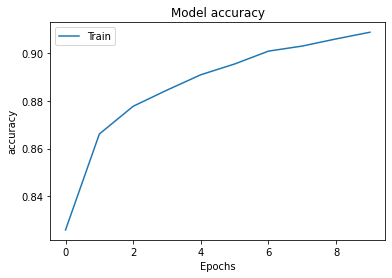

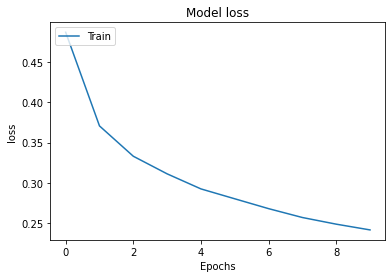

In [3]:
# Plot training and Testing accuracy values
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["Train","Test"],loc="upper left")
plt.show()
# Plot training and Testing loss values
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

In [4]:
# Rerunning with validation_split
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
# Recording model history and adding batch sizes
history = model.fit(X_train,y_train,epochs = 10,batch_size=10,validation_split=0.2)

test_loss , test_acc = model.evaluate(X_test,y_test)
print(test_acc)

from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test,y_pred)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4977 - accuracy: 0.8222 - val_loss: 0.4250 - val_accuracy: 0.8432
Epoch 2/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3786 - accuracy: 0.8616 - val_loss: 0.3643 - val_accuracy: 0.8643
Epoch 3/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3388 - accur

0.8751

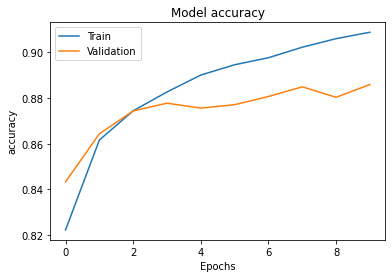

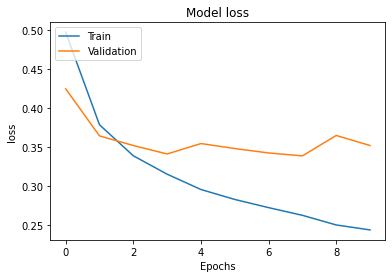

In [5]:
# Plot training and validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["Train","Validation"],loc="upper left")
plt.show()
# Plot training and validation loss values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Train","Validation"],loc="upper left")
plt.show()

In [6]:
# Pring the model accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test,y_pred)

0.8751

# Plotting the Confusion Matrix 

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe8f0c4c438>)

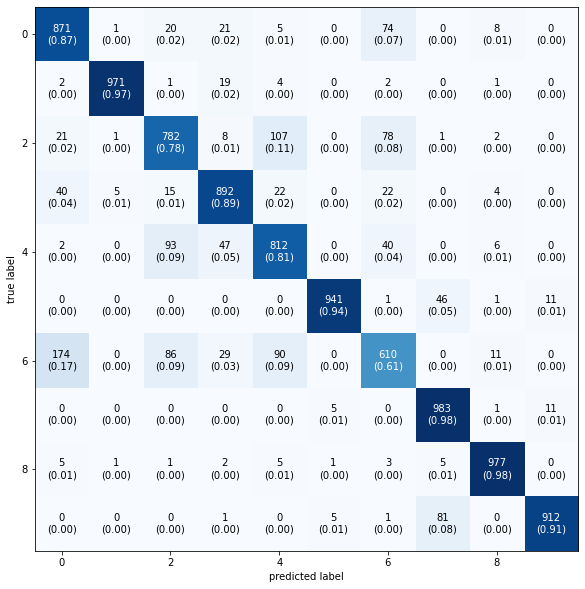

In [8]:
"""
A Really Bad Font
# font = {
#     'family' : "Times New Roman",
#     'weight' : 'bold',
#     'size' : 16
# }
# matplotlib.rc('font',**font)
"""

mat = confusion_matrix(y_test,y_pred)
# plot_confusion_matrix(conf_mat=mat,figsize=(10,10),class_names=class_names,show_normed=True)
plot_confusion_matrix(conf_mat=mat,figsize=(10,10),show_normed=True)

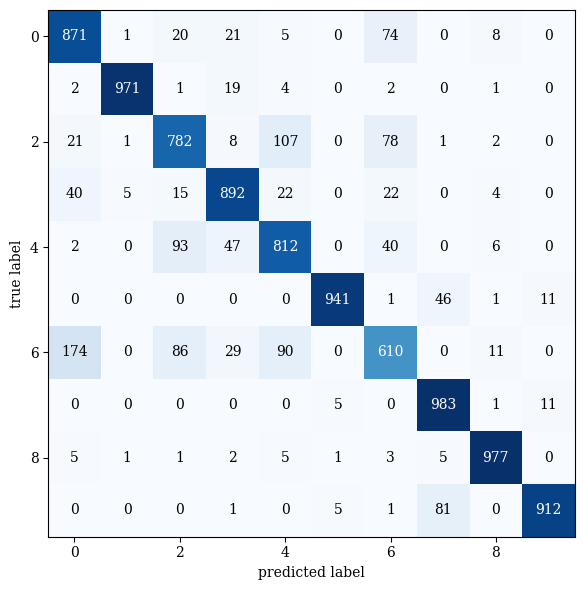

In [11]:
# Alternative Way
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plt.rc('font',family = 'Serif')

mat = confusion_matrix(y_test,y_pred)
# fig,ax = plot_confusion_matrix(conf_mat = mat , figsize = (6,6) , class_names = class_names , show_normed= False)
fig,ax = plot_confusion_matrix(conf_mat = mat , figsize = (6,6) , show_normed= False)
plt.tight_layout()
fig.savefig('cm.png')